Расчет максимально допустимой силы тока кабеля УЭЦН по гост Р 51777-2001

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

Исходные данные

In [8]:

#T - длительно допустимая температура нагрева жил кабеля, C
#Tср - температура окружающей среды

sigmai=400 #удельное сопротивелении изоляции на 1000 м
sigma_liquid=104
sigma_oil=425
sigma_water=1100
sigma_o=750 #материала оболочки
sigma_b=1000 #материала бандажа поверх оболочки
sigma_p=3 #материала подушки под броней
tlong=120 #длительно допустимая температура нагрева жилы
R=1.15 #электрическое сопротивление токопроводящей жилы
d=4.5  #номинальный диаметр токопроводящей жилы, мм
d1=7.5  #номинальный наружный диаметр первого слоя изоляции жилы, мм
d2=7.5  #номинальный наружный диаметр второго слоя изоляции жилы, мм
do=10 #номинальный диаметр оболочки жилы, мм
db=11 #номинальный наружный диаметр бандажа поверх оболочки жилы
Ds=20 #номинальный диаметр по скрутке жил, мм
Dp=12 #номинальный наружный диаметр подушки под броней 
D=30 # максимальный наружный диаметр круглого кабеля
#  максимальные наружные размеры плоского кабеля 
Dtr=120 #внутренний диаметр обсадной трубы скважины
H=12.5 #толщина
B=36 #ширина
alpha=0.0038 #температурный коэффициент электрического сопротивления материала
             #токопроводящей жилы, С-1



Исходные фунции

In [9]:
def s_c(sigmai,dn,Ds,d):
    #dn - наружный диаметр основной жилы под подушкой, мм, численно равный
    # d1, d2, do или db в зависимости от конструкции кабеля
    result=sigmai/6/3.14*math.log(Ds**3/6.8/dn**2/d)
    return result #тепловое сопротивление кабеля
    
def s_env(D,Dtr,sigma_water=sigma_water,sigma_oil=sigma_oil):
    #Тепловое сопротивление по Б.2.2.1 в скважинной жидкости нефтяной скважины
    result=1/2/3.14*10*(sigma_oil*(1/D+1/Dtr)+sigma_water/D)
    return result

def rt(R,t,alpha): 
    #электрическое сопротивление токопроводящей жилы, Ом
    result=R*(1+alpha*(t-20))
    return result

def i(t,t_env,s_c,s_env,rt): 
    #длительно допустимый ток I, A
    result=((t-t_env)*10**5/3/(s_c+s_env)/rt)**(1/2)
    return result

def tmax(s_c,s_env,rt,i,t):
    result=t+3*(s_c+s_env)*rt*i**2/10**5
    return result



## Применение
Зависимость длительно допустимого тока от температуры среды при данных условиях

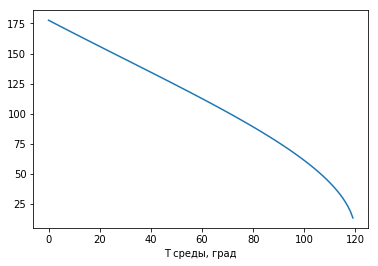

In [33]:
x=[]
y=[]
s_c_val=s_c(sigmai,d1,Ds,d)
s_env_val=s_env(D,Dtr,sigma_water=sigma_water,sigma_oil=sigma_oil)
for k in range(120):
    x.append(k)
    rt_val=rt(R,k,alpha)
    i_val=i(tlong,k,s_c_val,s_env_val,rt_val)
    y.append(i_val)

plt.plot(x,y,label='Сила тока от температуры среды')
plt.xlabel('T среды, град')
plt.show()    
    
    

In [3]:
t=100
'''print(s_c(sigmai,d1,Ds,d))
print(s_env(D,Dtr))
print(rt(R,t,alpha))

rtt=rt(R,t,alpha)
s_cc=s_c(sigmai,d1,Ds,d)
s_envv=s_env(D,Dtr)
rtt=rt(R,t,alpha)
ii=i(130,100,s_cc,s_envv,rtt)
print(i(130,100,s_cc,s_envv,rtt))
print(tmax(s_cc,s_envv,rtt,ii,t))'''
x=[]
y=[]
z=0
for k in range(1,10,1):
    z=k*0.1
    t=120 #температора среды
    minus=-z
    D=D+minus
    d1=d1+minus
    Ds=Ds+minus
    x.append(D)
    #rtt=rt(R,t,alpha)
    s_cc=s_c(sigmai,d1,Ds,d)
    s_envv=s_env(D,Dtr)
    rtt=rt(R,120,alpha)
    #ii=i(90,80,s_cc,s_envv,rtt)
    tmaxx=tmax(s_cc,s_envv,rtt,60,t)
    y.append(tmaxx)
    '''print(tmaxx)
    print(str(D)+'ll')'''
    

    
    

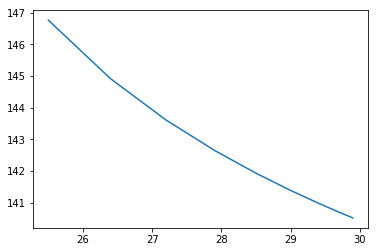

In [4]:
import matplotlib.pyplot as plt
plt.plot(x,y,label='')
'''plt.ylabel('natural sep')
plt.xlabel('qliq_scm3day')
plt.title('trouble with sigma_o, wct_perc=22')
plt.legend()'''
plt.show()